# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [11]:
import lightgbm
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

from Data.load_data import get_energy_data
from helper_functions import create_error_metrics

## Model Selection

We want to make a regression for energy demand in germany. This task can be achieved by using gradient boosting models. They have some advantages and disadvantages (taken from [neptune.ai](https://neptune.ai/blog/gradient-boosted-decision-trees-guide))

> #### Advantages of gradient boosting trees
>- generally more accurate compare to other modes,
>- train faster especially on larger datasets,
>- most of them provide support handling categorical features,
>- some of them handle missing values natively.

> #### Disadvantages of gradient boosting trees
>- prone to overfitting: this can be solved by applying L1 and L2 regularization penalties. You can try a low learning rate as well;
>- models can be computationally expensive and take a long time to train, especially on CPUs;
hard to interpret the final models.

In gradient boosting, an ensemble of weak learners (usually, decision trees) is used to improve the performance of a machine learning model. Their combined output results in better models. 
Weak learners work sequentially: Each model tries to improve on the error from the previous model. In the case of regression, the result is the average of all weak learners.

Thus, with gradient boosting models we can make a regression on energy demand and as they are described as fast training on large datasets with very good results.

## Feature Engineering

As the energy demand depends heavily on daily, weekly and yearly seasonality we need to add those features to our dataset.

In [2]:
df = get_energy_data()

df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

# Feature and target variable selection
X = df[['hour', 'day_of_week', 'day', 'month', 'day_of_year']]
y = df['Load']

# # Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Hyperparameter Tuning

[Discuss any hyperparameter tuning methods you've applied, such as Grid Search or Random Search, and the rationale behind them.]


In [3]:
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = lightgbm.LGBMRegressor()
parameters = { 
    # default -1
    # larger is usually better, but overfitting speed increases
    # limit the max depth for tree model
    "max_depth": [-1, 5, 10, 20, 50],
    
    # default 31
    # max number of leaves in one tree
    "num_leaves": [31, 50, 100, 200],
    
    # default: 0.1
    # learning_rate > 0.0 Typical: 0.05
    "learning_rate": [0.05, 0.1, 0.3, 0.5],
    
}

grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 20624, number of used features: 5
[LightGBM] [Info] Start training from score 230155.822407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 20724, number of used features: 5
[LightGBM] [Info] Start training from score 230172.771554
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

LGBMRegressor(learning_rate=0.5, num_leaves=200)

## Implementation

[Implement the final model(s) you've selected based on the above steps.]


In [4]:
# Implement the final model(s)
# Example: model = YourChosenModel(best_hyperparameters)
# model.fit(X_train, y_train)
grid_search.best_estimator_

LGBMRegressor(learning_rate=0.5, num_leaves=200)

## Evaluation Metrics

[Clearly specify which metrics you'll use to evaluate the model performance, and why you've chosen these metrics.]


In [5]:
# Evaluate the model using your chosen metrics
# Example for classification
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

# Example for regression
# mse = mean_squared_error(y_test, y_pred)
prediction = grid_search.predict(X_test)
# Your evaluation code here
create_error_metrics(y_test, prediction)

,MAE,MSE,RMSE,MAPE %,R2 %
0,2628.72,14671316.36,3830.32,1.19,99.08


## Graphs 

<Axes: >

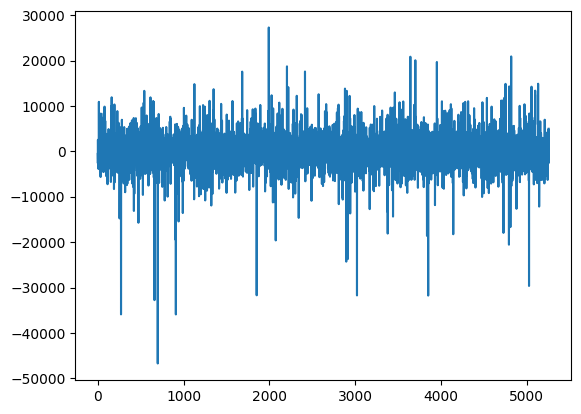

In [31]:
df_graph = pd.DataFrame()
df_graph["y_hat"] = prediction
df_graph["y"] = y_test.values
df_graph["y-y_hat"] = df_graph["y"] - df_graph["y_hat"]
# df_graph["y"].plot()
df_graph["y-y_hat"].plot()

## Comparative Analysis

[Compare the performance of your model(s) against the baseline model. Discuss any improvements or setbacks and the reasons behind them.]


In [6]:
# Comparative Analysis code (if applicable)
# Example: comparing accuracy of the baseline model and the new model
# print(f"Baseline Model Accuracy: {baseline_accuracy}, New Model Accuracy: {new_model_accuracy}")
